# A Data-Driven Analysis of Global Household Renewable Energy Usage

The global transition toward sustainable energy sources is a critical focus for climate action and economic development. This Exploratory Data Analysis (EDA) project uses Python and the Pandas library to deeply investigate a sampled dataset detailing household-level renewable energy adoption and usage.

The primary objective of this analysis is to uncover key patterns, trends, and relationships within the data. We will focus on answering crucial questions, such as:

- How do factors like Country, Income Level, and Urban/Rural classification influence the choice of Energy Source (e.g., Solar, Wind, Hydro)?
- What is the relationship between Household Size and Monthly Usage (kWh)?
- How effective are government incentives, like the Subsidies, in driving early Adoption Year and maximizing Cost Savings ($USD) for households?

In [1]:
#Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset
File_path = '../Energy Consumption Data/Renewable_Energy_Usage_Sampled.csv' #Creating a variable for the file path

df = pd.read_csv(File_path).copy() #Reading the csv file
df.info() #Looking into dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Household_ID       1000 non-null   object 
 1   Country            1000 non-null   object 
 2   Energy_Source      1000 non-null   object 
 3   Monthly_Usage_kWh  1000 non-null   float64
 4   Year               1000 non-null   int64  
 5   Household_Size     1000 non-null   int64  
 6   Income_Level       1000 non-null   object 
 7   Urban_Rural        1000 non-null   object 
 8   Adoption_Year      1000 non-null   int64  
 9   Subsidy_Received   1000 non-null   object 
 10  Cost_Savings_USD   1000 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 86.1+ KB


### Cleaning the data
We have to :
- Check if there are any missing values and duplicates
- Removing any unnecessary column that is not required for analysis
- Change the incorrect datatype if there is any

In [3]:
#Checking if there are any missing values 
missing_values = df.isnull().sum()
print(missing_values)

#No missing values were found

Household_ID         0
Country              0
Energy_Source        0
Monthly_Usage_kWh    0
Year                 0
Household_Size       0
Income_Level         0
Urban_Rural          0
Adoption_Year        0
Subsidy_Received     0
Cost_Savings_USD     0
dtype: int64


In [4]:
#Checking if there are any duplicate rows
duplicate_rows = df.duplicated().sum()
print(f'Total number of duplicate rows : {duplicate_rows}')
#No duplicate rows found

Total number of duplicate rows : 0


In [5]:
#Removing Unnecessary columns
df.drop(columns='Adoption_Year', inplace = True) #Removing the column 'Adoption_Year' which is not necessary for analysis

In [6]:
df.info()
# The datatypes are looking good for analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Household_ID       1000 non-null   object 
 1   Country            1000 non-null   object 
 2   Energy_Source      1000 non-null   object 
 3   Monthly_Usage_kWh  1000 non-null   float64
 4   Year               1000 non-null   int64  
 5   Household_Size     1000 non-null   int64  
 6   Income_Level       1000 non-null   object 
 7   Urban_Rural        1000 non-null   object 
 8   Subsidy_Received   1000 non-null   object 
 9   Cost_Savings_USD   1000 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 78.3+ KB


### Exploratory Data Analysis

#### 1. Identify the renewable energy source that is most widely used worldwide.

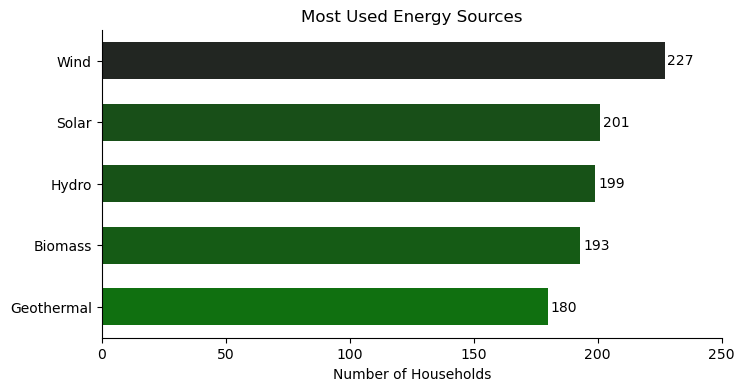

In [7]:
# Finding the number of households using each energy source
df_energy_source = df['Energy_Source'].value_counts().reset_index(name = 'Total_households')

# Using seaborn for visualization
plt.figure(figsize = (8,4)) # setting figure size
ax = sns.barplot(data= df_energy_source, x = 'Total_households', y = 'Energy_Source', width = 0.6, hue = 'Total_households', palette = 'dark:g_r', legend = False)

#Customizing the visual
sns.despine()
plt.title('Most Used Energy Sources')
plt.ylabel('')
plt.xlabel('Number of Households')
plt.xlim(0,250)

for container in ax.containers:
    ax.bar_label(container, padding = 2)

### Key Insights :
- **Wind Dominates:** Wind is the most frequently adopted renewable energy source in the sample, with **227** households utilizing it.

- **Highly Balanced Adoption:** The usage across the top three sources (Wind, Solar, and Hydro) is remarkably balanced, with counts clustered closely between 199 and 227, suggesting diverse but nearly equal preference among these options.

- **Geothermal Lags:** Geothermal energy is the least used source, accounting for the lowest number of households (180), which may indicate higher barriers to entry or lower geographical suitability compared to the other options.

#### 2. Which are the Countries with the highest energy consumption?

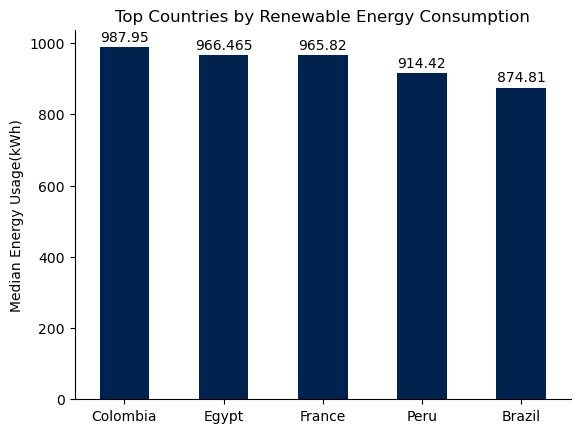

In [8]:
# Finding the countries with highest median energy consumption
df_countries = df.groupby('Country')['Monthly_Usage_kWh'].median().sort_values(ascending = False).head(5).reset_index(name = 'Median_energy_usage_kWh')

# Plotting a bar chart using pandas and matplotlib
ax = df_countries.plot(kind = 'bar', x = 'Country', y = 'Median_energy_usage_kWh', legend = False, colormap = 'cividis')
# Customizing the chart
sns.despine()
plt.title('Top Countries by Renewable Energy Consumption')
plt.xlabel('')
plt.ylabel('Median Energy Usage(kWh)')
plt.xticks(rotation = 0)

for container in ax.containers:
    ax.bar_label(container, padding = 2)

plt.show()

### Key Insights :
- **Colombia** has the highest median monthly renewable energy usage in the sample, demonstrating the most intense average household consumption.

- **Geographical Diversity at the Top:** The countries with the highest median usage (Colombia, Egypt, France) are geographically diverse, spanning South America, Africa, and Europe, suggesting high usage is not restricted to a single region.

- **Brazil is Mid-Tier High-Usage:** Brazil, while still in the top 5, is placed significantly below the leaders, indicating that its average household usage is high, but not the highest among the countries analyzed.

#### 3. What is the effect of household size on monthly energy consumption?

Text(0, 0.5, 'Household Size')

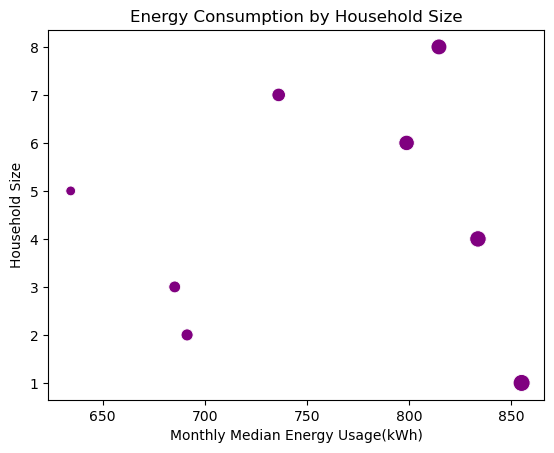

In [9]:
#Finding the monthly median energy usage by househols size
df_household = df.groupby('Household_Size')['Monthly_Usage_kWh'].median().reset_index(name = 'Energy_consumption')
#Using a scatterplot for visualization
sns.scatterplot(data = df_household, x = 'Energy_consumption', y = 'Household_Size', size = 'Energy_consumption', legend = False, color = 'purple',sizes = (50,150))
plt.title('Energy Consumption by Household Size')
plt.xlabel('Monthly Median Energy Usage(kWh)')
plt.ylabel('Household Size')

### Key Insights :
- **No Linear Correlation:** There is no **clear positive** or **negative correlation** between household size and total monthly energy usage. The lowest energy consumption point is from a size 5 household ($\approx 630 \text{ kWh}$), while the single-person household (size 1) has one of the highest consumptions ($\approx 855 \text{ kWh}$).

- **Household Size is Not the Primary Driver:** The data shows a wide spread of consumption values, indicating that **household size is not the primary factor** driving total energy use. Factors like building efficiency, climate-driven heating/cooling demands, or the number/type of appliances used must have a greater influence.

- **High Variability Across Sizes:** The highest consumption rates (above $800 \text{ kWh}$) are exhibited by households across the entire size spectrum (sizes 1, 4, 6, and 8), confirming that high energy usage is **not exclusive** to larger households.

#### 4. How many Low-Income Rural & Urban Households received Subsidies?

Text(0.5, 0.98, 'Low-Income Household Subsidy Coverage: Rural and Urban Comparison')

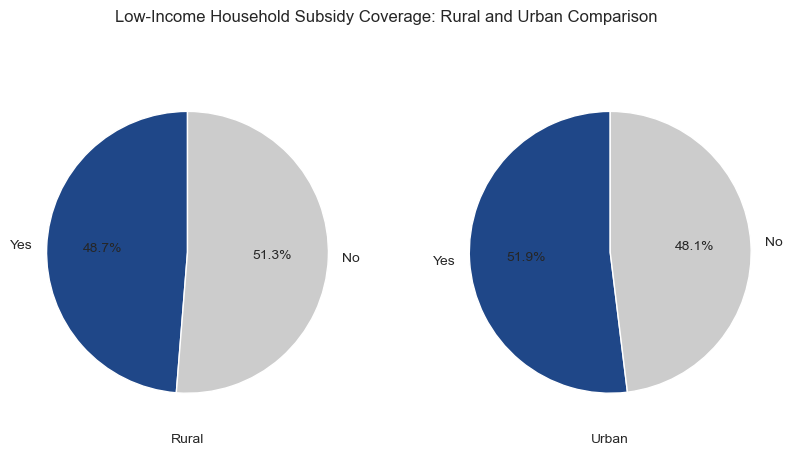

In [61]:
fig, ax = plt.subplots(1,2, figsize = (10,5)) # Setting up the subplots
two_contrasting_colors = ['#1f4788', '#CCCCCC'] #Colors to be used in the pie plot

#Filtering for low-income rural households that received subsidies
df_rural = df[(df['Income_Level'] == 'Low') & (df['Urban_Rural'] == 'Rural')]
#Plotting a pie plot using pandas
df_rural['Subsidy_Received'].value_counts().sort_values(ascending = True).plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%', startangle=90, colors=two_contrasting_colors ) 

#Filtering for low-income Urban households that received subsidies
df_urban = df[(df['Income_Level'] == 'Low') & (df['Urban_Rural'] == 'Urban')]
#Plotting a pie plot using pandas
df_urban['Subsidy_Received'].value_counts().sort_values(ascending = False).plot(kind = 'pie', ax = ax[1], autopct = '%1.1f%%', startangle=90, colors=two_contrasting_colors )

#Customizing the plots
ax[0].set_xlabel('Rural')
ax[1].set_xlabel('Urban')
ax[0].set_ylabel('')
ax[1].set_ylabel('')
fig.suptitle('Low-Income Household Subsidy Coverage: Rural and Urban Comparison', fontsize = 12)



### Key Insights :
- **Higher Coverage in Urban Areas:** A slightly **higher percentage of low-income urban households received subsidies (51.9%)** compared to **low-income rural households ($48.7\%$).**

- **Near Even Split in Rural Areas:** Low-income rural households are almost evenly split in terms of coverage, with a slight majority ($51.3\%$) not receiving subsidies compared to those who did ($48.7\%$).

- **Overall Coverage Gap Exists:** In both geographic areas, a significant portion of low-income households still do not receive subsidies (Rural: $51.3\%$; Urban: $48.1\%$), indicating a considerable gap in subsidy coverage regardless of location.

#### 5. What is the annual trend of overall renewable energy usage (in kWh) across all sampled households?

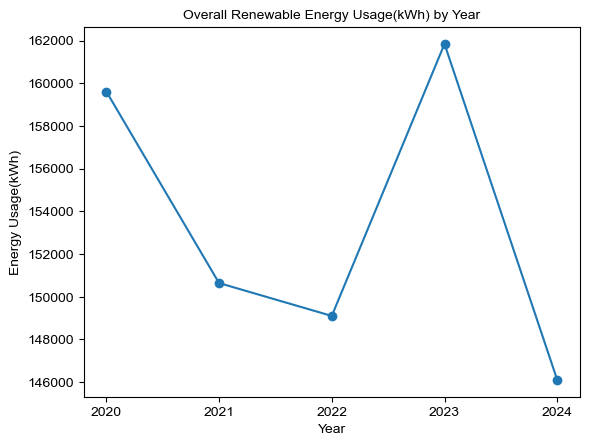

In [ ]:
#Sorting the Year column in ascending order
df_year = df.sort_values(by = 'Year')
df_yearly_usage = df_year.groupby('Year')['Monthly_Usage_kWh'].sum().reset_index(name = 'Overall_usage') # creating a dataframe with year and Total Usage

df_yearly_usage.plot(kind = 'line', x = 'Year', y = 'Overall_usage', legend = False, marker = 'o') # Using pandas for plotting a line chart

#Customizing the plot
min_year = df_yearly_usage['Year'].min()
max_year = df_yearly_usage['Year'].max()
sns.set_style(style = 'ticks')
plt.xticks(ticks=range(min_year, max_year + 1))
plt.title('Overall Renewable Energy Usage(kWh) by Year', fontsize = 10)
plt.ylabel('Energy Usage(kWh)')
plt.show()

### Key Insights:
- **Overall Decline and High Volatility:** The data shows a net decrease in overall monthly usage from the start of the period to the end, dropping by approximately $\mathbf{-8.47\%}$ from 2020 to 2024. The total usage exhibits high volatility, with the range between the lowest point (2024 at $146,106 \text{ kWh}$) and the highest point (2023 at $161,850 \text{ kWh}$) being a significant $15,744 \text{ kWh}$.

- **Initial Two-Year Decline:** Usage experienced a consistent drop over the first two years, falling by $-5.62\%$ in 2021 and a further $-1.02\%$ in 2022. This suggests a period where either the reporting of total usage decreased, or factors like system maintenance or reduced energy demand outweighed new adoption.

- **Sharpest Fluctuations:** The usage trend is dominated by two massive swings in the later period: a sharp $\mathbf{+8.55\%}$ peak in 2023, followed immediately by a drastic $\mathbf{-9.73\%}$ trough in 2024. The $\mathbf{-9.73\%}$ drop from 2023 to 2024 is the single largest YoY fluctuation, resulting in 2024 having the lowest total usage recorded in the entire dataset.